# Mini Project: Provisinal COVID-19 Deaths Data

## 1. Research Question

How has the adoption of electric vehicles (EVs) varied across different makes and models in Washington State, and what trends can be observed in EV adoption by model year?

## 2. Dataset Documentation

https://catalog.data.gov/dataset/electric-vehicle-population-datahe 

Descirption: This dataset includes details about electric vehicles registered in Washington State, including make, model, model year, electric range, vehicle type, and location (ZIP code).

Time period: Current registrations as of the latest update which was September 20, 2025. The created date was November 10, 2020.

Why I chose it: This dataset directly supports my research question regarding EV adoption by manufacturer and model year in Washington State.

## 3. Import

In [79]:
# --- Data Cleaning ---
import pandas as pd

# Load the dataset
df = "s3://ia340-2025-35102/Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(df, dtype=str)
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTDKN3DP2D,Yakima,Yakima,WA,98902,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,0,15,165252538,POINT (-120.51904 46.59783),PACIFICORP,53077001201
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37,0,26,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,53035092200
2,JM3KKBHA9R,Kitsap,Kingston,WA,98346,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,23,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,53035090102
3,7SAYGDEE8P,Thurston,Olympia,WA,98501,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,53067011821
4,5YJ3E1EB5K,Thurston,Rainier,WA,98576,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,20,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,53067012530


## Cleaning Data

In [80]:
#check data set info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261698 entries, 0 to 261697
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         261698 non-null  object
 1   County                                             261688 non-null  object
 2   City                                               261688 non-null  object
 3   State                                              261698 non-null  object
 4   Postal Code                                        261688 non-null  object
 5   Model Year                                         261698 non-null  object
 6   Make                                               261698 non-null  object
 7   Model                                              261698 non-null  object
 8   Electric Vehicle Type                              261698 non-null  object
 9   Clea

In [81]:
#summary stats
df.describe(include='all')

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
count,261698,261688,261688,261698,261688,261698,261698,261698,261698,261698,261695,261695,261070,261698,261680,261688,261688
unique,15753,236,854,52,1055,21,46,181,2,3,111,31,49,261698,1052,76,2306
top,7SAYGDEE7P,King,Seattle,WA,98052,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41,256200906,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033028200
freq,1199,130129,41125,261070,6344,60215,108777,54720,208281,160888,160888,258510,15931,1,6344,93510,2050


In [82]:
#check for missing values
df.isnull().sum() 

VIN (1-10)                                             0
County                                                10
City                                                  10
State                                                  0
Postal Code                                           10
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         3
Base MSRP                                              3
Legislative District                                 628
DOL Vehicle ID                                         0
Vehicle Location                                      18
Electric Utility                                      10
2020 Census Tract                                     10
dtype: int64

In [84]:
#drop rows with missing critical fields
df = df.drop_duplicates()

In [88]:
df.shape

(261698, 17)

In [89]:
#drop duplicates
df['Model Year'] = df['Model Year'].astype(int)

In [90]:
#fix data types
df['Model Year'] = df['Model Year'].astype(int)

In [91]:
#validate ranges
# Check year range
df['Model Year'].value_counts().sort_index()

Model Year
2000        8
2002        1
2003        1
2008       20
2010       22
2011      631
2012     1440
2013     4081
2014     3327
2015     4574
2016     5253
2017     8767
2018    14524
2019    11043
2020    12395
2021    20937
2022    29647
2023    60215
2024    49869
2025    29495
2026     5448
Name: count, dtype: int64

There seem to have been no missing values within the VIN, State,  Model Year, Make, Model, EV Type, CAFV Elgibility, and DOL Vehcile ID. I dropped rows with missing critical fields, duplicates, and validated ranges. 

## 5. Process / Aggregate

In [102]:
# Aggregate: Count of EVs by Manufacturer (Make)
make_counts = df['Make'].value_counts().reset_index()
make_counts.columns = ['Make', 'Vehicle Count']
make_counts = make_counts.sort_values(by='Vehicle Count', ascending=False)
print("EV Counts by Manufacturer (Make):")
print(make_counts)

# Aggregate: Count of EVs by Model Year
year_counts = df['Model Year'].value_counts().reset_index()
year_counts.columns = ['Model Year', 'Vehicle Count']
year_counts = year_counts.sort_values(by='Model Year')
print("\nEV Counts by Model Year:")
print(year_counts)

# Create new variable 'Decade' based on Model Year
df['Decade'] = (df['Model Year'] // 10) * 10

# Aggregate: Count of EVs by Decade
decade_counts = df['Decade'].value_counts().reset_index()
decade_counts.columns = ['Decade', 'Vehicle Count']
decade_counts = decade_counts.sort_values(by='Decade')
print("\nEV Counts by Decade:")
print(decade_counts)


EV Counts by Manufacturer (Make):
                      Make  Vehicle Count
0                    TESLA         108777
1                CHEVROLET          18908
2                   NISSAN          16224
3                     FORD          13988
4                      KIA          12849
5                   TOYOTA          10845
6                      BMW          10809
7                  HYUNDAI           8936
8                   RIVIAN           7932
9                    VOLVO           6797
10              VOLKSWAGEN           6773
11                    JEEP           6709
12                    AUDI           5359
13                CHRYSLER           3847
14           MERCEDES-BENZ           3017
15                   HONDA           2586
16                  SUBARU           2542
17                 PORSCHE           1831
18                CADILLAC           1719
19                POLESTAR           1477
20                   MAZDA           1359
21                   LEXUS           1220


I created the new variable of Decade by grouping the Model Year into decades. This code groups EV registrations by decade, which helps you analyze adoption trends over longer time periods. This shows a dramtic increase in vehcile count from 2000 to 2020. 

## Query

In [103]:
# Filter the dataset to include only EVs from 2020 and newer
recent_ev = df[df['Model Year'] >= 2020]

# Show a sample of the filtered data
recent_ev[['Make', 'Model', 'Model Year']].head()


,Make,Model,Model Year
1,FORD,ESCAPE,2025
2,MAZDA,CX-90,2024
3,TESLA,MODEL Y,2023
7,LEXUS,RX,2024
10,NISSAN,LEAF,2020


In [104]:
# Filter for Tesla vehicles
tesla_ev = df[df['Make'].str.lower() == 'tesla']

# Show sample
tesla_ev[['Model', 'Model Year', 'Electric Range']].head()


,Model,Model Year,Electric Range
3,MODEL Y,2023,0
4,MODEL 3,2019,220
5,MODEL 3,2019,220
9,MODEL S,2017,210
15,MODEL S,2018,249


## Visualization

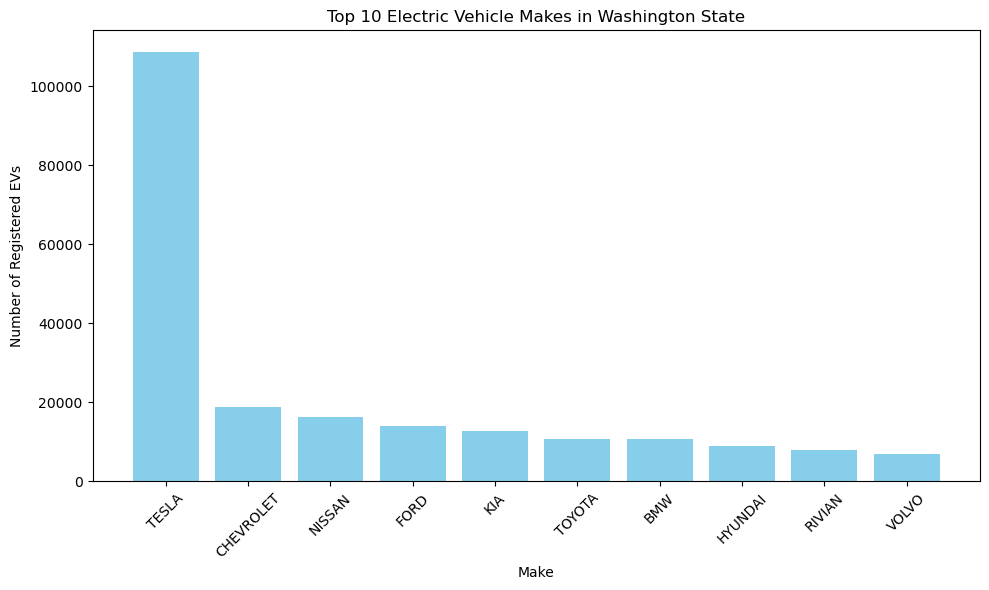

In [105]:
import matplotlib.pyplot as plt

top_makes = make_counts.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_makes['Make'], top_makes['Vehicle Count'], color='skyblue')
plt.title('Top 10 Electric Vehicle Makes in Washington State')
plt.xlabel('Make')
plt.ylabel('Number of Registered EVs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


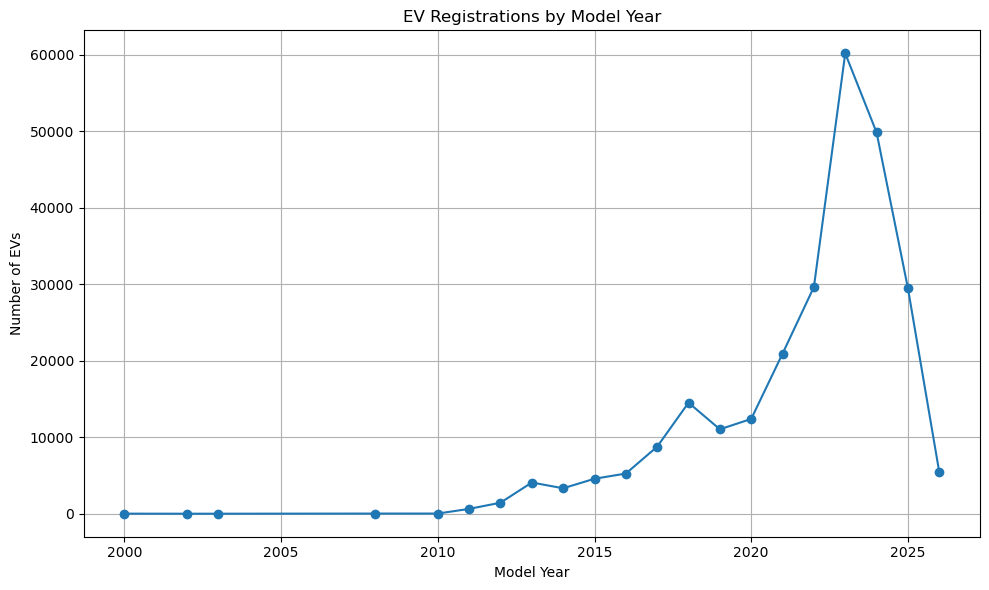

In [106]:
plt.figure(figsize=(10,6))
plt.plot(year_counts['Model Year'], year_counts['Vehicle Count'], marker='o')
plt.title('EV Registrations by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.grid(True)
plt.tight_layout()
plt.show()
